In [23]:
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import pressure_tools
from cmocean import cm

%matplotlib inline

In [2]:
path = '/data/bmoorema/results/pond/strat_cont'
prefix = 'SalishSeaIdeal_1h_20170701_20170706'
runIDs = ['basic', 'bottom10x', 'ahm5x', 'bottom10x_ahm5x']
maskfile = os.path.join(path, f'SalishSeaPond_basic_S4d', 'mesh_mask.nc')

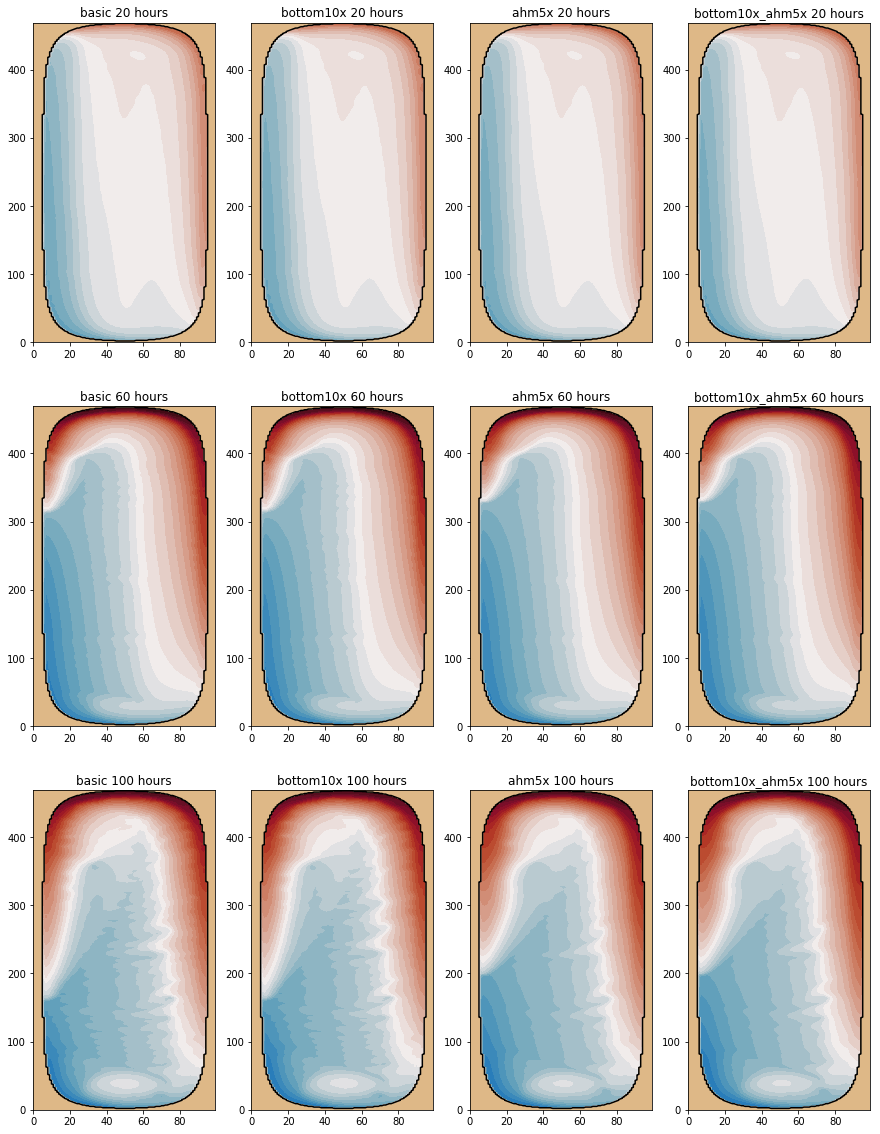

In [37]:
fig, axs = plt.subplots(3, 4, figsize=(15, 20))

for row, t in zip(axs, [20, 60, 100]):
    for ax, runID in zip(row, runIDs):
        params = pressure_tools.load_results(t, os.path.join(path, f'SalishSeaPond_{runID}_S4d'), prefix, maskfile)
        GEO = pressure_tools.calc_geostrophic_velocities(22, params)
        ax.contourf(params['x'], params['y'], params['eta'], levels=np.arange(-0.09, 0.1, 0.005), cmap=cm.balance)
        ax.contourf(params['x'], params['y'], params['tmask'][0, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(params['x'], params['y'], params['tmask'][0, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')

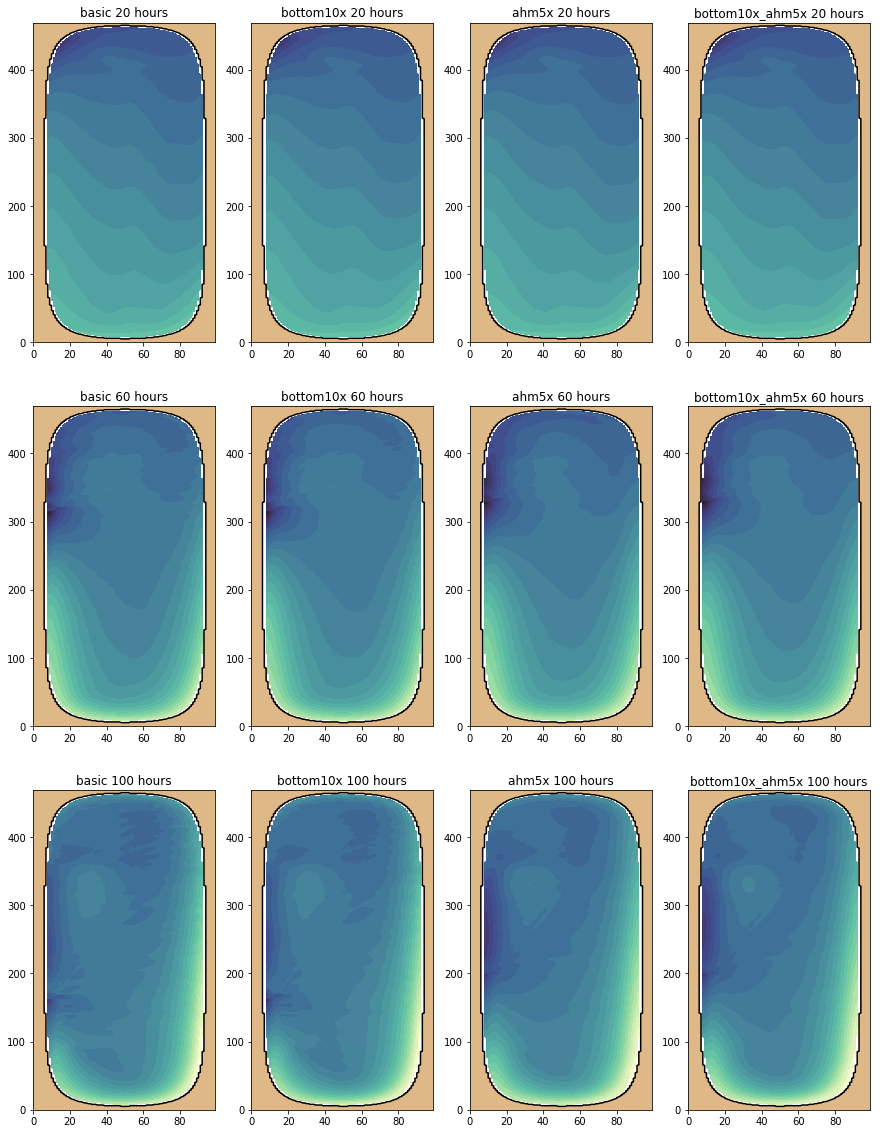

In [52]:
fig, axs = plt.subplots(3, 4, figsize=(15, 20))

for row, t in zip(axs, [20, 60, 100]):
    for ax, runID in zip(row, runIDs):
        params = pressure_tools.load_results(t, os.path.join(path, f'SalishSeaPond_{runID}_S4d'), prefix, maskfile)
        GEO = pressure_tools.calc_geostrophic_velocities(24, params)
        ax.contourf(params['x'], params['y'], GEO['pressure']*1e-4, levels=np.arange(48.98, 49.005, 0.001), cmap=cm.deep)
        ax.contourf(params['x'], params['y'], params['tmask'][22, ...], levels=[-0.01, 0.01], colors='burlywood')
        ax.contour(params['x'], params['y'], params['tmask'][22, ...], levels=[-0.01, 0.01], colors='k')
        ax.set_title(f'{runID} {t} hours')